In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

train_df = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
test_df = pd.read_csv('DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)

train_df = train_df.dropna()
test_df = test_df.dropna()

train_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [20]:
test_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2018-10-27,24.750000,54.250000,3.475000,1013.875000
2018-10-28,20.875000,57.250000,7.875000,1015.875000
2018-10-29,22.125000,63.500000,1.850000,1016.875000


In [21]:
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

Training data shape: (1462, 4)
Testing data shape: (632, 4)


In [22]:
features = ['meantemp', 'humidity', 'meanpressure']

data_train = train_df[features].values
data_test = test_df[features].values

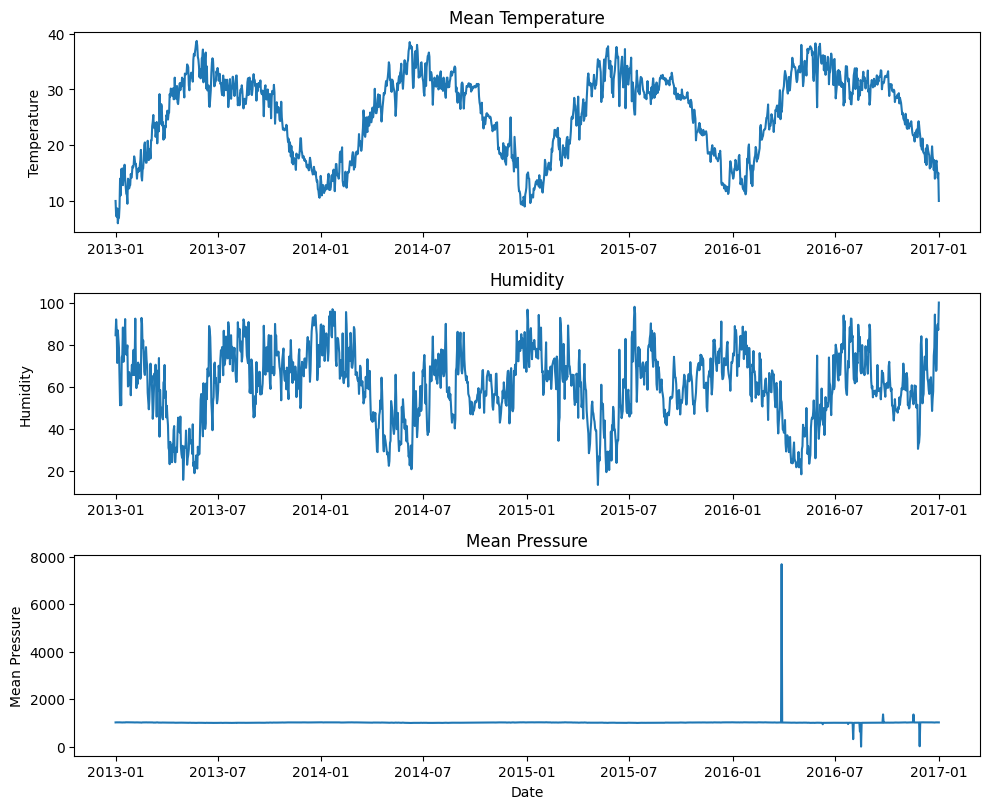

In [23]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plotting meanpressurem_1
axes[0].plot(train_df.index,train_df['meantemp'])
axes[0].set_title('Mean Temperature')
axes[0].set_ylabel('Temperature')

# Plotting meantempm
axes[1].plot(train_df.index, train_df['humidity'])
axes[1].set_title('Humidity')
axes[1].set_ylabel('Humidity')

# Plotting precipm_1
axes[2].plot(train_df.index, train_df['meanpressure'])
axes[2].set_title('Mean Pressure')
axes[2].set_ylabel('Mean Pressure')

# Adjust layout
plt.tight_layout()
plt.xlabel('Date')
plt.show()


In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

In [25]:
sequence_length = 30

In [26]:
X_train, y_train = [], []
for i in range(len(data_train_scaled) - sequence_length):
    X_train.append(data_train_scaled[i:i+sequence_length, :])
    y_train.append(data_train_scaled[i+sequence_length, :])

X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], X_train.shape[2]), activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1152      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
 dense_3 (Dense)             (None, 3)                 24        
                                                                 
Total params: 1407 (5.50 KB)
Trainable params: 1407 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50


41/41 [==============================] - 3s 15ms/step - loss: 0.1680 - val_loss: 0.0933
Epoch 2/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0754 - val_loss: 0.0517
Epoch 3/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0437 - val_loss: 0.0290
Epoch 4/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0274 - val_loss: 0.0172
Epoch 5/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0187 - val_loss: 0.0113
Epoch 6/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0140 - val_loss: 0.0083
Epoch 7/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0112 - val_loss: 0.0071
Epoch 8/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0093 - val_loss: 0.0062
Epoch 9/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 10/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 11/50
41/41 [==========

In [29]:
X_test, y_test = [], []
for i in range(len(data_test_scaled) - sequence_length):
    X_test.append(data_test_scaled[i:i+sequence_length, :])
    y_test.append(data_test_scaled[i+sequence_length, :])
X_test, y_test = np.array(X_test), np.array(y_test)

test_predictions_scaled = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

19/19 [==============================] - 0s 3ms/step


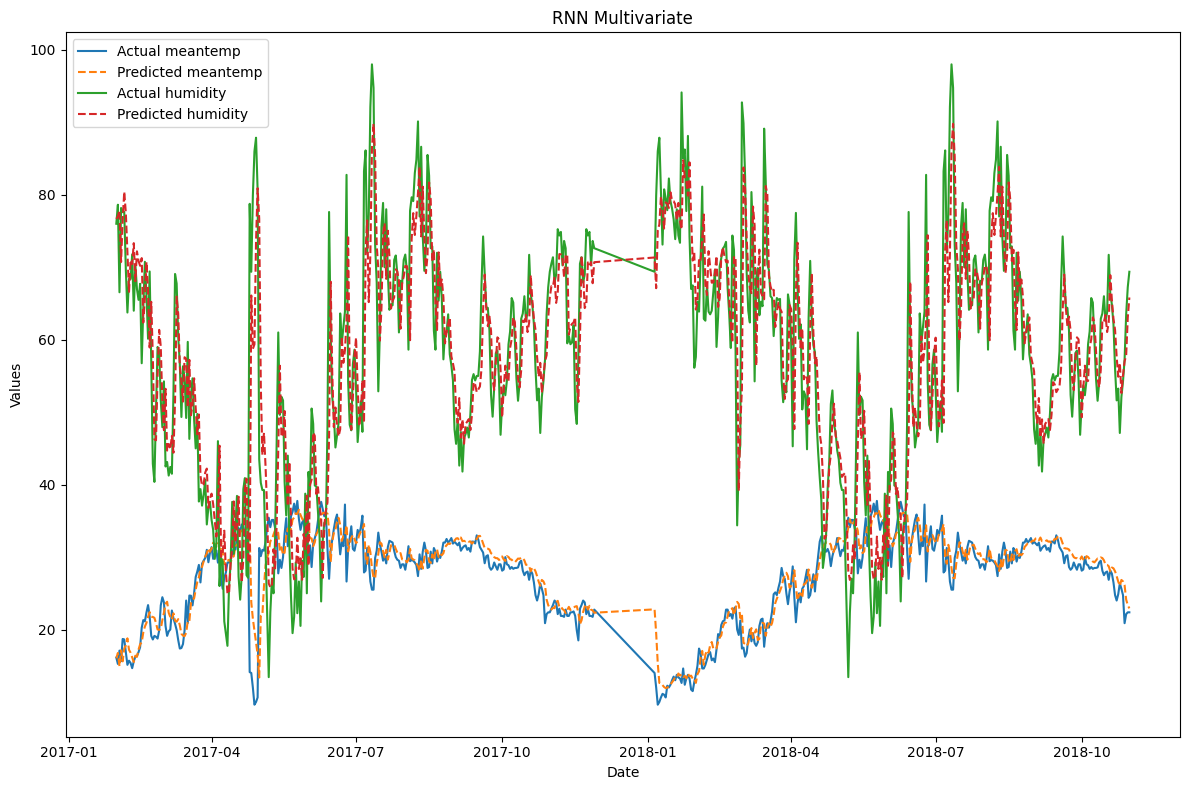

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot the results
for i in range(2):
    plt.plot(test_df.index[sequence_length:], data_test[sequence_length:, i], label='Actual ' + features[i])
    plt.plot(test_df.index[sequence_length:], test_predictions[:, i], label='Predicted ' + features[i], linestyle='dashed')

plt.ylabel('Values')
plt.xlabel('Date')
plt.legend()
plt.title('RNN Multivariate')
plt.tight_layout()
plt.show()

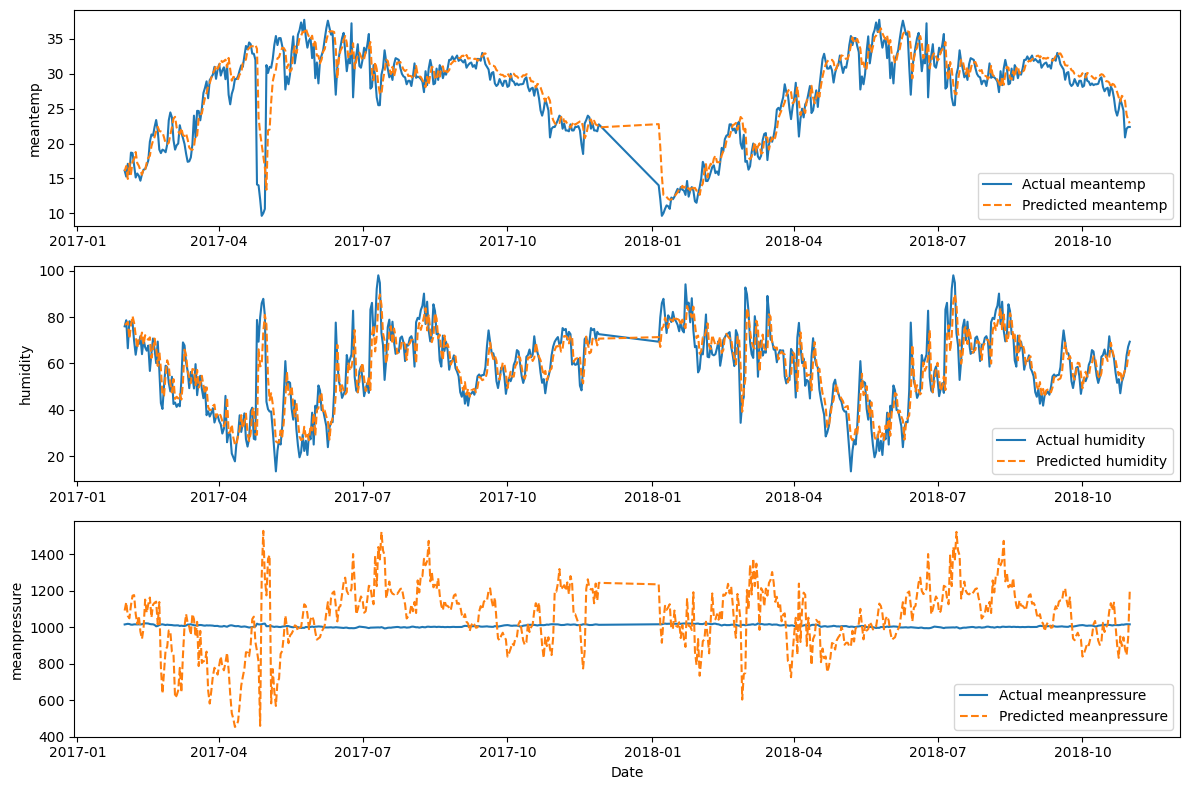

In [31]:
plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(test_df.index[sequence_length:], data_test[sequence_length:, i], label='Actual ' + features[i])
    plt.plot(test_df.index[sequence_length:], test_predictions[:, i], label='Predicted ' + features[i], linestyle='dashed')
    plt.ylabel(features[i])
    plt.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
rmse_features = []
for i in range(3):
    rmse_feature = np.sqrt(mean_squared_error(data_test[sequence_length:, i], test_predictions[:, i]))
    rmse_features.append(rmse_feature)
    print(f"RMSE for {features[i]}: {rmse_feature}")

RMSE for meantemp: 2.4162296934210423
RMSE for humidity: 8.25296353088178
RMSE for meanpressure: 181.21370014074097


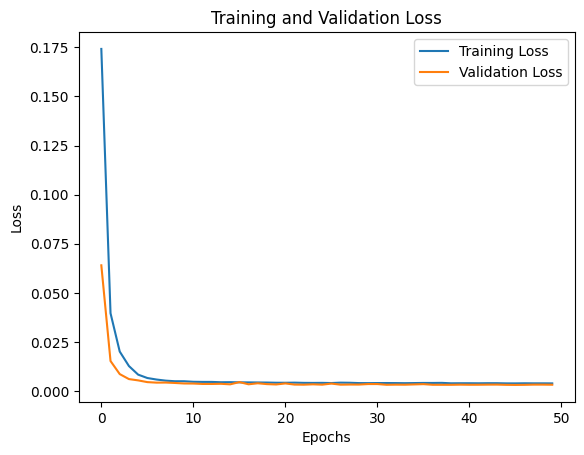

In [ ]:
# Plot epochs vs loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()